<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>NUMERIEK BEPALEN VAN DE NULPUNTEN VAN EEN FUNCTIE</h1>
        <h2>De methode van Newton</h2>
    </font>
</div>

<div class="alert alert-box alert-success"> 
In de wiskundeles leer je de nulwaarden van een functie berekenen door vergelijkingen op te stellen en die op te lossen door technieken, zoals de regel van Horner en de methode van de discriminant, toe te passen. Soms is het echter niet mogelijk om de nulwaarden op die manier te vinden. Denk bv. aan een veeltermfunctie - wat een relatief eenvoudige functie is - met enkel niet-rationale nulpunten. In de wiskundeles zal men dan naar de grafische rekenmachine of de computer grijpen om die nulwaarden te bepalen.<br>
In deze notebook zal je de nulwaarden leren bepalen door ze numeriek te benaderen a.d.h.v. de methode van Newton.
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>1. Inleiding</h2> 
    </font>
</div>

In Python kan je een functievoorschrift ingeven m.b.v. het sleutelwoord `lambda`, op de manier die je ziet in de volgende code-cellen.

In [2]:
f = lambda x: x**2 - 2               # f staat voor de functie die x afbeeldt op x²-2

In [3]:
f(3)

7

In [4]:
x = np.arange(-7, 7, 0.1)           # NumPy-lijst van originelen aanmaken 
y = f(x)                            # NumPy-lijst van overeenkomstige beelden aanmaken   
print("x", x)
print("y", y)

x [-7.00000000e+00 -6.90000000e+00 -6.80000000e+00 -6.70000000e+00
 -6.60000000e+00 -6.50000000e+00 -6.40000000e+00 -6.30000000e+00
 -6.20000000e+00 -6.10000000e+00 -6.00000000e+00 -5.90000000e+00
 -5.80000000e+00 -5.70000000e+00 -5.60000000e+00 -5.50000000e+00
 -5.40000000e+00 -5.30000000e+00 -5.20000000e+00 -5.10000000e+00
 -5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.000

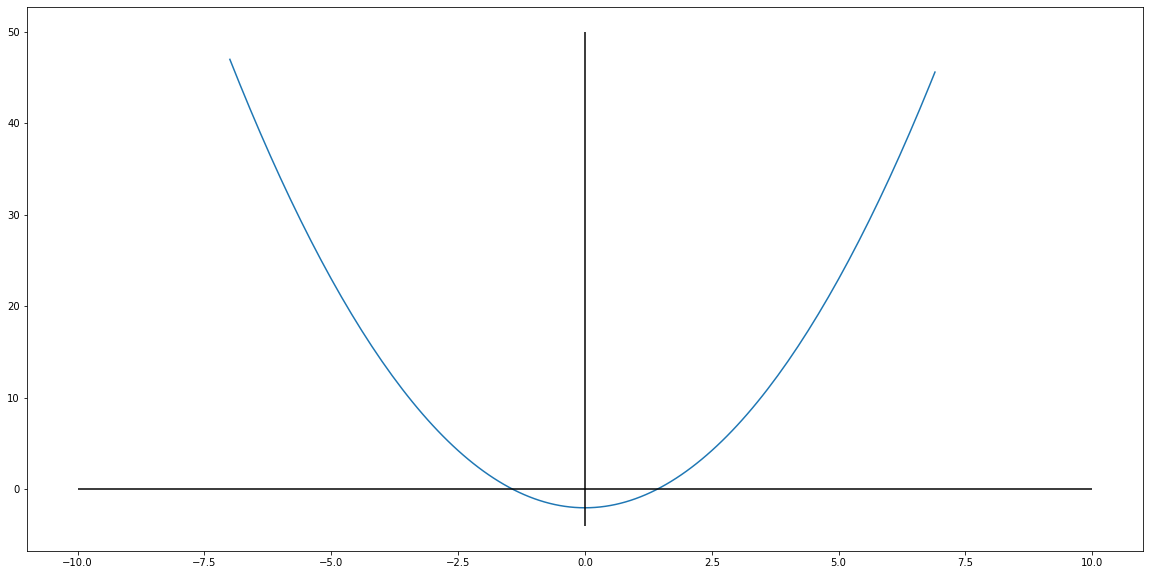

In [5]:
# grafiek
plt.figure(figsize=(20,10))

plt.plot(x,y)

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

De grafiek van f heeft twee snijpunten met de x-as. De nulwaarden zijn $\sqrt2$ en $-\sqrt2$. 

In [6]:
np.sqrt(2)

1.4142135623730951

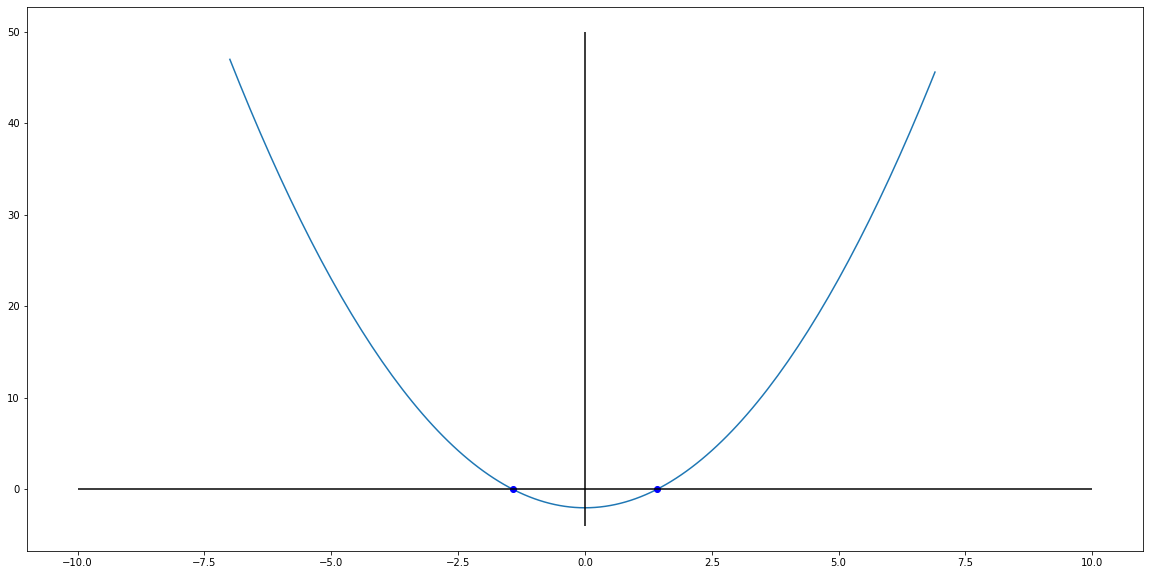

In [7]:
# grafiek met nulwaarden aangeduid
plt.figure(figsize=(20,10))

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

Met de methode van Newton kan je deze nulpunten bepalen door ze geleidelijk aan te benaderen.

<div>
    <font color=#690027 markdown="1">
        <h2>2. Methode van Newton</h2> 
    </font>
</div>

Stel dat *f* een continue functie is die een of meerdere nulwaarden heeft. Wanneer je een willekeurig element kiest van het domein van *f*, dan is de kans dat dat net een nulwaarde is heel klein. De methode van Newton laat toe om dat element te gebruiken om een nulwaarde in de buurt te benaderen.

Kies een punt op de grafiek van *f*. Beschouw de raaklijn door dat punt aan de grafiek van *f*. Deze raaklijn zal in de meeste gevallen de x-as snijden, en het snijpunt zal bovendien dichter bij een snijpunt van *f* met de x-as liggen.

Ligt het snijpunt nog niet dicht genoeg bij het snijpunt van *f* met de x-as, dan ga je als volgt te werk: je beschouwt het punt op de grafiek van *f* met dezelfde x-coordinaat als het gevonden snijpunt en voert de methode opnieuw uit op dat punt. 

Om deze methode door de computer te kunnen laten uitvoeren, definieer je eerst de functie `newton()`. Deze functie vraagt als parameters de functie waarop je de methode wilt toepassen, haar afgeleide functie en het gekozen element van het domein van de functie.<br>
De afgeleide in het gekozen punt is de richtingscoëfficiënt van de raaklijn in dat punt; zo is er voldoende informatie om de raaklijn te kunnen opstellen. 

In [8]:
# methode van Newton
def newton(f, df, a): 
    """Benadert een nulwaarde van de functie f door de raaklijn in a aan de grafiek van f te snijden met de x-as."""
    # bereken snijpunt van raaklijn in x0 met x-as
    s = a - f(a)/df(a)
    return s

Je zal m.b.v. deze functie de nulwaarde $\sqrt 2$ benaderen.

Om deze methode toe te passen, heb je ook de afgeleide functie nodig.

In [9]:
# afgeleide functie
df = lambda x: 2 * x  

In [10]:
# methode van Newton toepassen in het punt (2, f(2))
s1 = newton(f, df, 2)

punt = (s1, f(s1))
print(punt)

(1.5, 0.25)


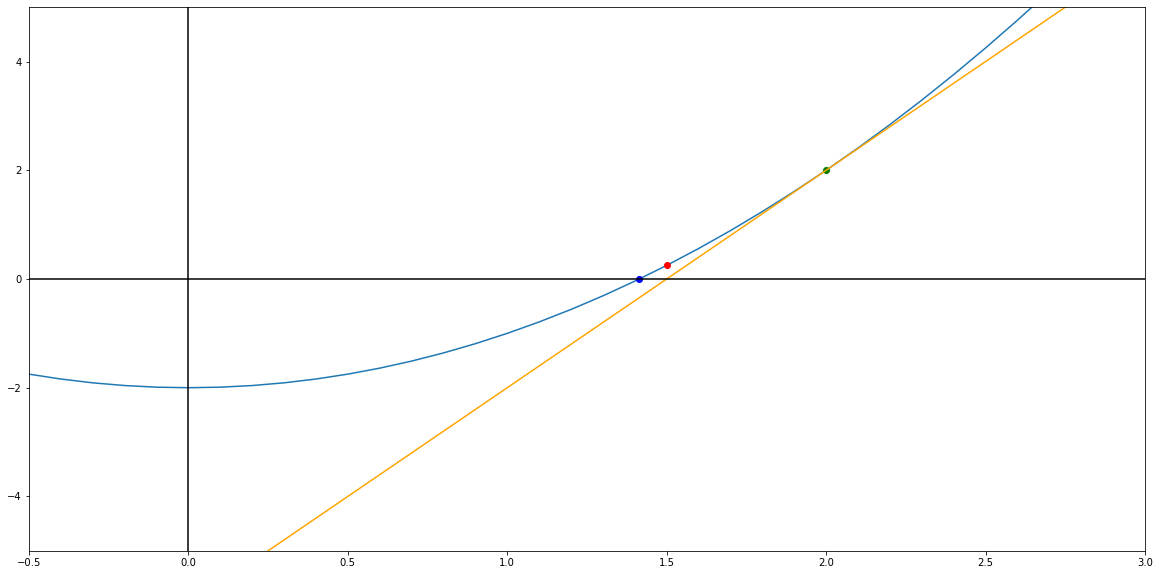

In [11]:
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=-0.5, xmax=3, ymin=-5, ymax= 5)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(2, f(2), "o", color="green")

y_raaklijn_2 = df(2) * (x - 2) + f(2) 
plt.plot(x, y_raaklijn_2, color="orange")

s1 = newton(f, df, 2)
plt.plot(s1, f(s1), "o", color="red")

plt.vlines(0, -5, 5, color="black")
plt.hlines(0, -10, 10, color="black")

plt.show()

Je voert de functie `newton()` herhaaldelijk uit, in principe totdat je het bekomen resultaat nauwkeurig genoeg vindt.

<div>
    <font color=#690027 markdown="1">
        <h2>3. Methode herhaaldelijk toepassen</h2> 
    </font>
</div>

Je herhaalt `newton()` dus enkele keren; daarbij pas je het gekozen punt steeds aan. Het punt zal dichter en dichter bij het snijpunt van *f* met de x-as liggen.

Na deze eerste stap, gebruik je het rode punt. 

In [12]:
# methode van Newton toepassen in punt (s1, f(s1))
s2 = newton(f, df, 1.5)

punt = (s2, f(s2))
print(punt)

(1.4166666666666667, 0.006944444444444642)


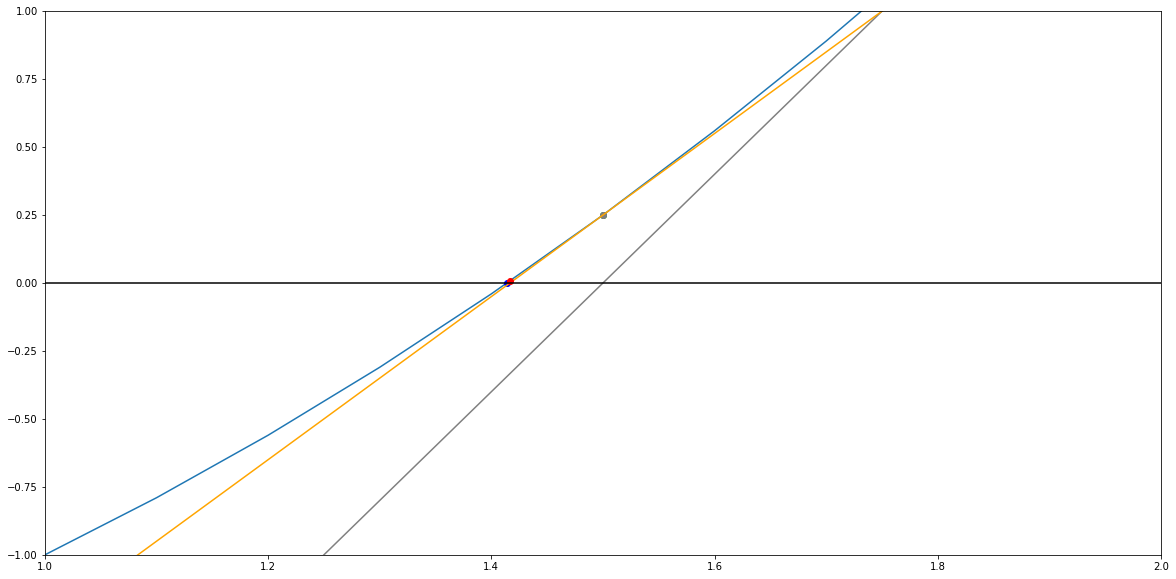

In [13]:
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=1, xmax=2, ymin=-1, ymax= 1)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(2, f(2), "o", color="black")
plt.plot(1.5, f(1.5), "o", color="green")

y_raaklijn_2 = df(2) * (x-2) + f(2) 
plt.plot(x, y_raaklijn_2, color="grey")

s1 = newton(f, df, 2)
plt.plot(s1, f(s1), "o", color="grey")

y_raaklijn_15 = df(1.5) * (x-1.5) + f(1.5) 
plt.plot(x, y_raaklijn_15, color="orange")

s2 = newton(f, df, 1.5)
plt.plot(s2, f(s2), "o", color="red")

plt.vlines(0, -5, 5, color="black")
plt.hlines(0, -10, 10, color="black")

plt.show()

### Opdracht 3.1
- Voor de volgende stap gebruik je `s2`. Voer uit.
- Die vervolgens nog een stap. 

Je vindt vrij snel een mooie benadering voor $\sqrt 2$.

In [14]:
# voorbeeldcode
# methode van Newton toepassen in punt (s2, f(s2))
s3 = newton(f, df, s2)

punt = (s3, f(s3))
print(punt)

(1.4142156862745099, 6.007304882871267e-06)


In [15]:
# voorbeeldcode
# methode van Newton toepassen in punt (s3, f(s3))
s4 = newton(f, df, s3)

punt = (s4, f(s4))
print(punt)

(1.4142135623746899, 4.510614104447086e-12)


In [16]:
# voorbeeldcode
np.sqrt(2)

1.4142135623730951

### Antwoord
1,4142135623746899 is een benadering voor $\sqrt 2$.<br>
De beeldwaarde wijkt met een kleine waarde af van 0. 

<div class="alert alert-box alert-info"> 
Je merkte misschien op dat:<br>
<ul><li> het zo snel ging omdat het punt waarvan je vertrekt al vrij dicht bij de te zoeken nulwaarde ligt;</li>
<li>als vertrekpunt 0 nemen niet lukt omdat de *df(0) = 0* en er dan gedeeld wordt door 0. Het punt (0, f(0)) is immers de top van de parabool. </li>
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>4. Recursie (facultatief)</h2> 
    </font>
</div>

In [17]:
def newton_recursief(f, df, x0, tol):
    """Benadert een nulwaarde van de functie f door de raaklijn in x0 aan de grafiek van f te snijden met de x-as, tot de tolerantie bereikt is."""
     
    if abs(f(x0)) < tol:
        # stop recursie, x0 is gewenste beandering van nulwaarde
        return x0
    else:
        # bereken snijpunt van raaklijn in x0 met x-as
        s = x0 - f(x0)/df(x0)
        return newton_recursief(f, df, s, tol)

In [18]:
newton_recursief(f, df, 2, 0.001)

1.4142156862745099

<div>
    <font color=#690027 markdown="1">
        <h2>5. Oefeningen</h2> 
    </font>
</div>

### Opdracht 5.1

Benader het andere nulpunt van dezelfde functie *f*.

### Opdracht 5.2

Benader de nulpunten van een andere, zelf gekozen functie.

<div>
    <font color=#000000 markdown="1">
        <h2>Referentielijst</h2>
    </font>
</div>

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html